In [22]:
import pandas as pd
import numpy as np
#데이터시각화
import matplotlib.pyplot as plt
import matplotlib


#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN

In [23]:
%matplotlib inline
matplotlib.rc('font', family='NanumGothic')
plt.rc('font', family ='NanumGothic')
plt.rcParams["axes.unicode_minus"] = False

In [24]:
df_raw = pd.read_csv('/home/piai/bigdata/data/BigData/직무능력평가.csv', engine = "python")
df.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [25]:
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)
df_raw_scaled[:5]

array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [26]:
df_raw_y = df_raw_scaled[:,0]

In [27]:
df_raw_x = df_raw_scaled[:,1::]

In [28]:
Z_ward = linkage(df_raw_x, method = 'ward', metric = 'euclidean')

In [29]:
Z_average = linkage(df_raw_x, method = "average", metric = "euclidean")

In [42]:
Z_Minkowski= linkage(df_raw_x, method = "average", metric = "minkowski")

In [43]:
Z_ward

array([[14.        , 26.        ,  0.52156235,  2.        ],
       [ 3.        , 27.        ,  0.65700712,  2.        ],
       [ 9.        , 22.        ,  0.84734214,  2.        ],
       [16.        , 28.        ,  1.13863458,  2.        ],
       [ 6.        ,  7.        ,  1.17063718,  2.        ],
       [ 1.        , 21.        ,  1.22298201,  2.        ],
       [11.        , 32.        ,  1.31728974,  3.        ],
       [ 2.        ,  4.        ,  1.33423955,  2.        ],
       [24.        , 36.        ,  1.47235046,  4.        ],
       [30.        , 37.        ,  1.65014418,  4.        ],
       [18.        , 35.        ,  1.78970024,  3.        ],
       [29.        , 34.        ,  1.8539993 ,  3.        ],
       [10.        , 12.        ,  1.88477465,  2.        ],
       [31.        , 38.        ,  1.94570646,  6.        ],
       [25.        , 33.        ,  2.11914806,  3.        ],
       [ 5.        , 42.        ,  2.16582648,  3.        ],
       [17.        , 19.

Text(0, 0.5, 'sample index')

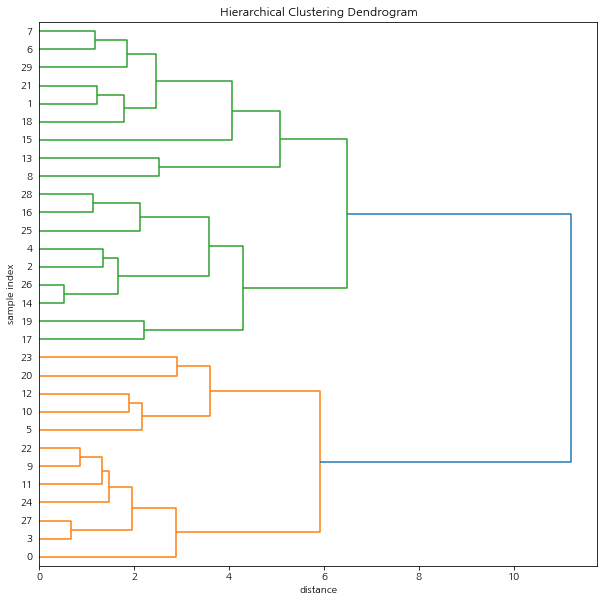

In [31]:
plt.figure(figsize = (10,10))
ax =plt.subplot(111)
dendrogram(Z_ward, leaf_font_size=10, orientation="right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [34]:
cluster_hierarchical = fcluster(Z=Z_ward, t = 5, criterion = "distance")
df_raw["ClusterHierarchical"] =cluster_hierarchical
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,5
2,71,70,68,69,76,86,48,3
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,3


In [38]:
ds_summary_hc = df_raw.groupby("ClusterHierarchical").agg(["min",'mean','max'])
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0 + "_" +level1
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc.round(3)

,ClusterHierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47


In [41]:
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error=[]
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({"NumberofCluster":cluster_range,"Error":clus_error})
ds_error

,NumberofCluster,Error
0,1,180.000000
1,2,114.082503
2,3,94.368903
3,4,79.138123
4,5,66.607411
5,6,57.102110
6,7,52.970778
7,8,42.259987
8,9,37.105892
9,10,31.733620
